## Retail Analysis with Walmart Data

### Project Description

### One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

### Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

### Dataset Description

#### This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

* Store - the store number

* Date - the week of sales

* Weekly_Sales -  sales for the given store

* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

* Temperature - Temperature on the day of sale

* Fuel_Price - Cost of fuel in the region

* CPI – Prevailing consumer price index

* Unemployment - Prevailing unemployment rate

### Holiday Events:

* Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

* Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

* Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

* Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Analysis Tasks
* Which store has maximum sales
* Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
* Which store/s has good quarterly growth rate in Q3’2012
* Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
* Provide a monthly and semester view of sales in units and give insights
* For Store 1 – Build  prediction models to forecast demand
    * Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.
    * Change dates into days by creating new variable.

In [1]:
# Import required libraries

import numpy as np
import pandas as pd

from matplotlib import dates
from datetime import datetime

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
# Load the dataset
df = pd.read_csv('Walmart_Store_sales.csv')

In [3]:
# Check the first 5 records
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
# Find out the number of rows and columns
df.shape

(6435, 8)

In [5]:
# See more info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
# The datatype of Date column is object. Convert it to datatime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [7]:
# Check for null values in the dataset
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#### From above, we can see that there are no null values in the dataset.

## Task 1: Which store has the maximum sales

In [8]:
# Group the dataset according to the stores and find the sum of weekly sales and sort them in descending order
max_store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Convert the series into a dataframe and reset its index
max_store_sales = pd.DataFrame(max_store_sales)
max_store_sales.reset_index(inplace=True)
max_store_sales

,Store,Weekly_Sales
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08
5,10,2.716177e+08
6,27,2.538559e+08
7,6,2.237561e+08
8,1,2.224028e+08
9,39,2.074455e+08


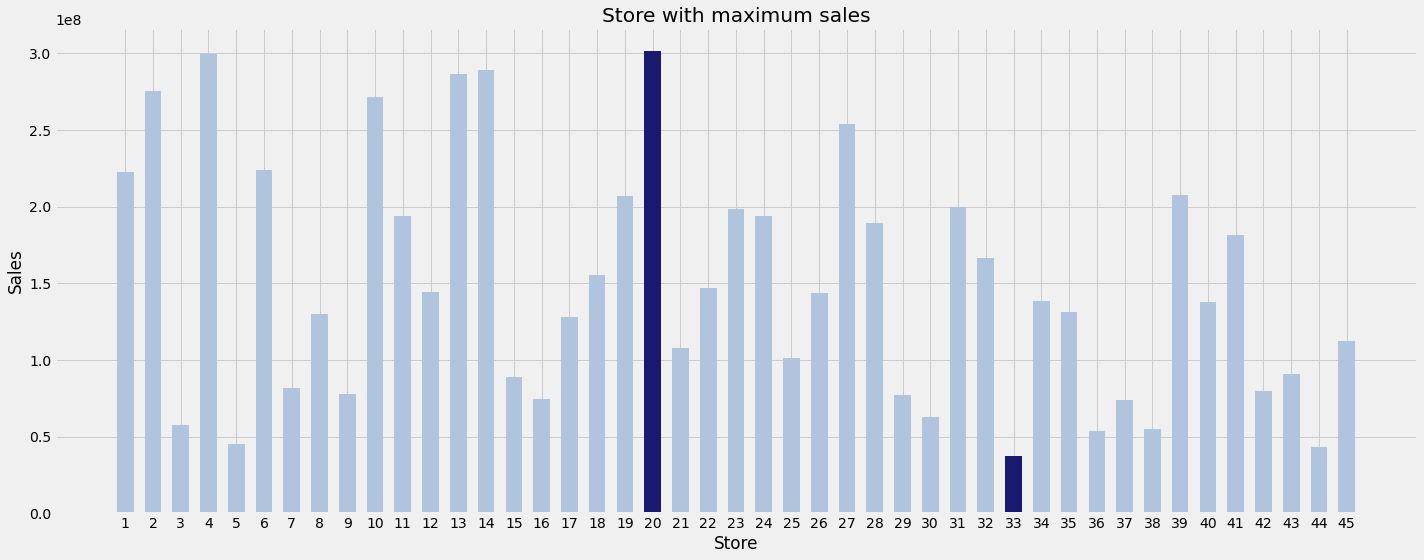

In [9]:
# Plot the store and sales on a bar graph to find the store with maximum and minimum sales

# Use styles for better presentation
plt.style.use('fivethirtyeight')

# Set the figure size to 20:8 to present it
plt.figure(figsize=(20, 8))

x = max_store_sales['Store']
y = max_store_sales['Weekly_Sales']

# Set color of the bar graph depending on the maximum and minimum sales
color = ['lightsteelblue' if (x < max(max_store_sales['Weekly_Sales']) and x > min(max_store_sales['Weekly_Sales']))
         else 'midnightblue' for x in max_store_sales['Weekly_Sales']]

# Plot the graph
plt.bar(x, y, color=color, width=0.6)

# Set the properties of the graph and display it
plt.title('Store with maximum sales')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.xticks(ticks=x, labels=x)
plt.tight_layout()
plt.show()

### From the above bar graph and statistics, we can conclude that Store #20 has the maximum sales while Store #33 has the minimum sales

## Task 2: Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [10]:
# Group the dataset according to the stores and find the sum of weekly sales.
# Appply std() & mean() and sort them in descending order according to std()
max_store_std = df.groupby('Store')['Weekly_Sales'].agg(['std', 'mean']).sort_values(by='std',ascending=False)

# Convert the result into dataset, reset index and rename columns
max_store_std = pd.DataFrame(max_store_std)
max_store_std.reset_index(inplace=True)
max_store_std.rename(columns={"Store":'Store', 'std':'Standard_Deviation', 'mean':'Mean'}, inplace=True)
max_store_std

,Store,Standard_Deviation,Mean
0,14,317569.949476,2.020978e+06
1,10,302262.062504,1.899425e+06
2,20,275900.562742,2.107677e+06
3,4,266201.442297,2.094713e+06
4,13,265506.995776,2.003620e+06
5,23,249788.038068,1.389864e+06
6,27,239930.135688,1.775216e+06
7,2,237683.694682,1.925751e+06
8,39,217466.454833,1.450668e+06
9,6,212525.855862,1.564728e+06


In [11]:
# Print the store with maximum std()
print(f'''Store #{max_store_std.loc[0, 'Store']} \
has the maximum standard deviation of {max_store_std.loc[0, 'Standard_Deviation']:.2f}''')

Store #14 has the maximum standard deviation of 317569.95


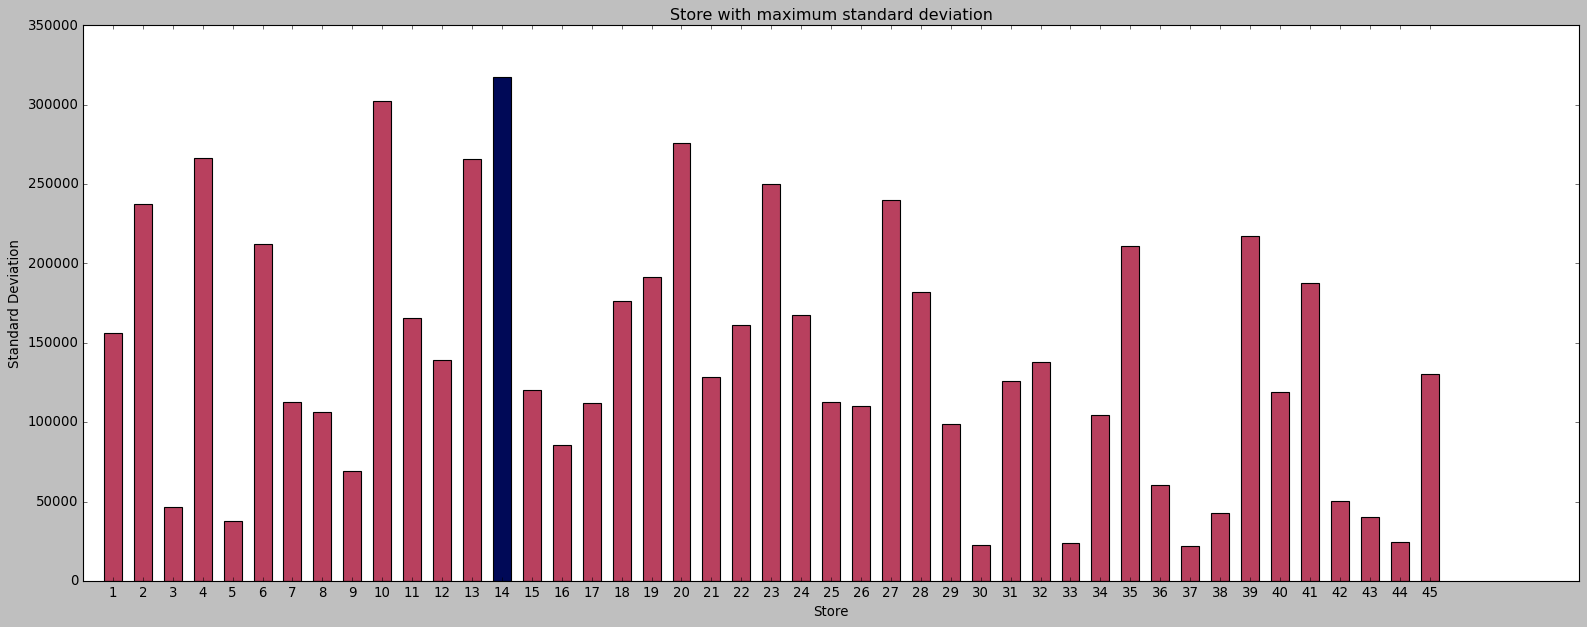

In [12]:
# Plot the store and sales on a bar graph to find the store with maximum and minimum sales

# Use styles for better presentation
plt.style.use('classic')

# Set the figure size to 20:8 to present it
plt.figure(figsize=(20, 8))

x = max_store_std['Store']
y = max_store_std['Standard_Deviation']

# Set color of the bar graph depending on the maximum and minimum sales
color = ['#B8405E' if (x < max(max_store_std['Standard_Deviation'])) 
         else '#000957' for x in max_store_std['Standard_Deviation']]

# Plot the graph
plt.bar(x, y, color=color, width=0.6)

# Set the properties of the graph and display it
plt.title('Store with maximum standard deviation')
plt.xlabel('Store')
plt.ylabel('Standard Deviation')
plt.xticks(ticks=x, labels=x)
plt.tight_layout()
plt.show()

### According to the graph, Store #14 has the maximum standard deviation. Lets plot the sales of Store #14 to verify.

In [13]:
# Apply filter to find all the data related to Store #14
filt = df[df['Store'] == 14]
filt

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1859,14,2010-05-02,2623469.95,0,27.31,2.784,181.871190,8.992
1860,14,2010-12-02,1704218.84,1,27.73,2.773,181.982317,8.992
1861,14,2010-02-19,2204556.70,0,31.27,2.745,182.034782,8.992
1862,14,2010-02-26,2095591.63,0,34.89,2.754,182.077469,8.992
1863,14,2010-05-03,2237544.75,0,37.13,2.777,182.120157,8.992
...,...,...,...,...,...,...,...,...
1997,14,2012-09-28,1522512.20,0,64.88,3.997,192.013558,8.684
1998,14,2012-05-10,1687592.16,0,64.89,3.985,192.170412,8.667
1999,14,2012-12-10,1639585.61,0,54.47,4.000,192.327265,8.667
2000,14,2012-10-19,1590274.72,0,56.47,3.969,192.330854,8.667


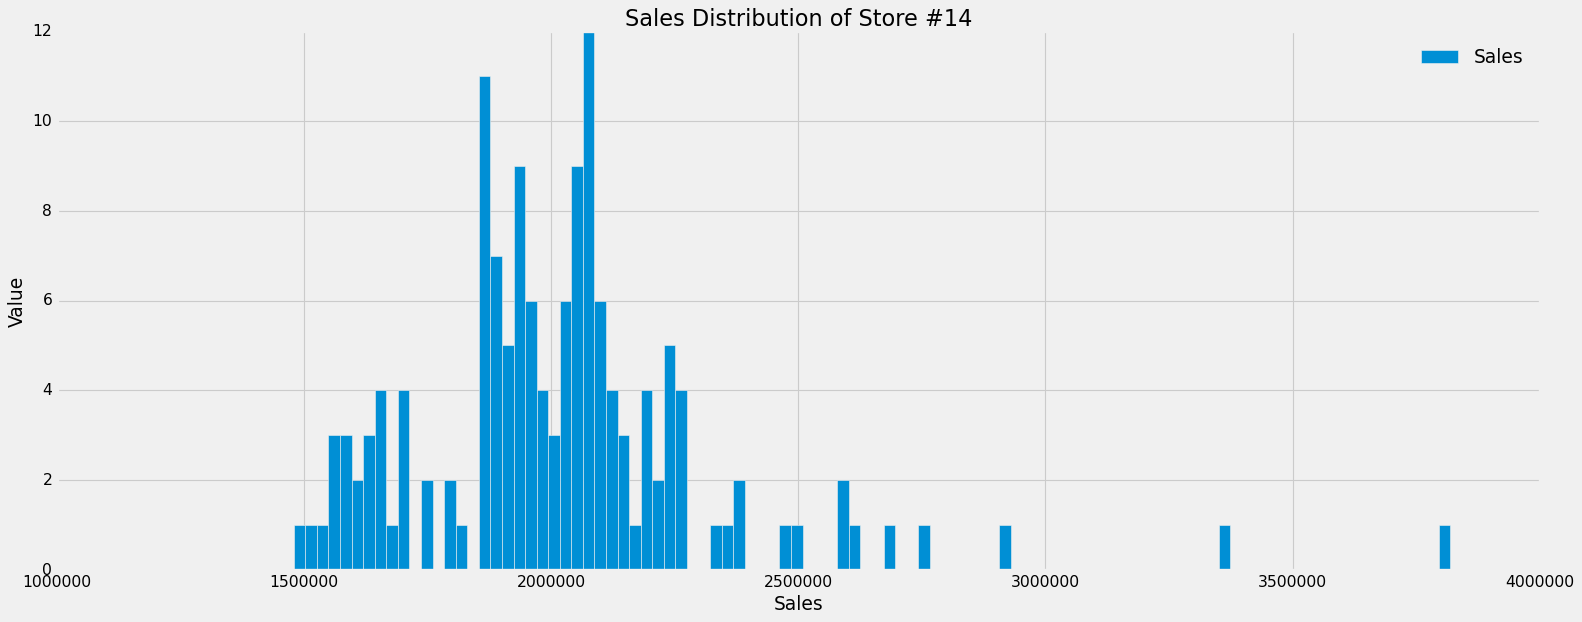

In [14]:
# Plot the sales of Store #14 on a histogram
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,8))
plt.hist(filt['Weekly_Sales'], bins=100, label='Sales')
plt.xlabel('Sales')
plt.title('Sales Distribution of Store #14')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

### From the above graph, we can see that Store #14 has the maximum Standard Deviation with respect to sales

In [15]:
# Find the coefficient of variation or mean to standard deviation
# Do this by grouping the data according to store and finding the weekly sales
grp = df.groupby('Store')['Weekly_Sales']

# Apply the function for coefficient of variation, i.e, standard_deviation/mean * 100
coef_variation = (grp.std()/grp.mean()) * 100

# Convert the result into dataset, reset index, rename columns and sort according to coefficient of variation
coef_variation = pd.DataFrame(coef_variation)
coef_variation.reset_index(inplace=True)
coef_variation.rename(columns={'Store':'Store', 'Weekly_Sales':'Coefficient_of_Variation'}, inplace=True)
coef_variation.sort_values(by='Coefficient_of_Variation', ascending=False, inplace=True)
coef_variation

,Store,Coefficient_of_Variation
34,35,22.968111
6,7,19.730469
14,15,19.338399
28,29,18.374247
22,23,17.972115
20,21,17.029239
44,45,16.561273
15,16,16.518065
17,18,16.284550
35,36,16.257891


In [16]:
# Print the store with highest coefficient of variation and print by how much
print(f'''Store #{coef_variation.loc[34, 'Store']} has the highest Coefficient of Variation, i.e,\n
Coefficient of mean to Standard Deviation of {coef_variation.loc[34, 'Coefficient_of_Variation']:.2f}''')

Store #35 has the highest Coefficient of Variation, i.e,

Coefficient of mean to Standard Deviation of 22.97


In [17]:
# Apply filter to find all the data of Store #35
filt = df[df['Store'] == 35]
filt

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4862,35,2010-05-02,1230613.50,0,27.19,2.784,135.352461,9.262
4863,35,2010-12-02,1168815.31,1,29.81,2.773,135.411308,9.262
4864,35,2010-02-19,1270658.64,0,32.44,2.745,135.465778,9.262
4865,35,2010-02-26,1020651.74,0,36.00,2.754,135.519519,9.262
4866,35,2010-05-03,1162610.27,0,38.07,2.777,135.573260,9.262
...,...,...,...,...,...,...,...,...
5000,35,2012-09-28,814099.86,0,64.92,3.997,142.765750,8.839
5001,35,2012-05-10,866064.40,0,64.50,3.985,142.851683,8.665
5002,35,2012-12-10,873643.14,0,55.40,4.000,142.937617,8.665
5003,35,2012-10-19,829284.67,0,56.53,3.969,142.863363,8.665


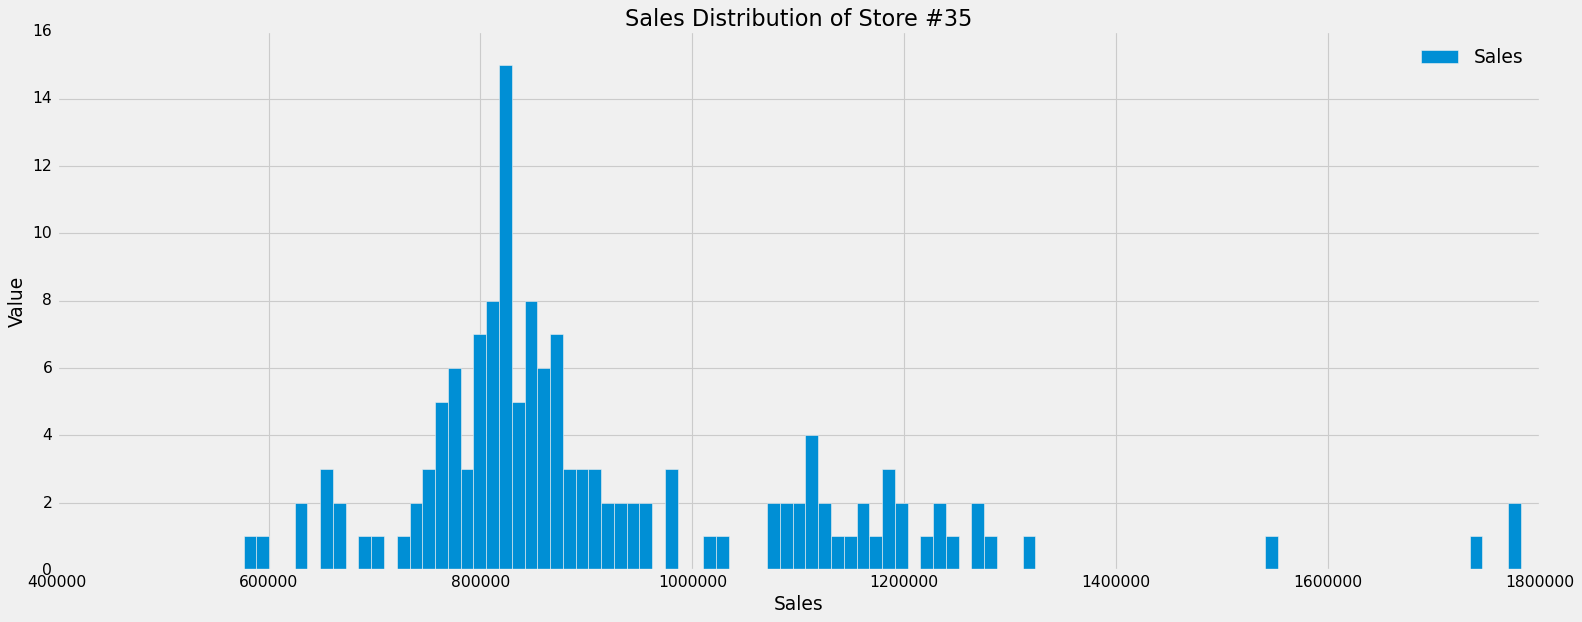

In [18]:
# Plot a histogram of weekly sales of Store #35
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,8))
plt.hist(filt['Weekly_Sales'], bins=100, label='Sales')
plt.xlabel('Sales')
plt.title('Sales Distribution of Store #35')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

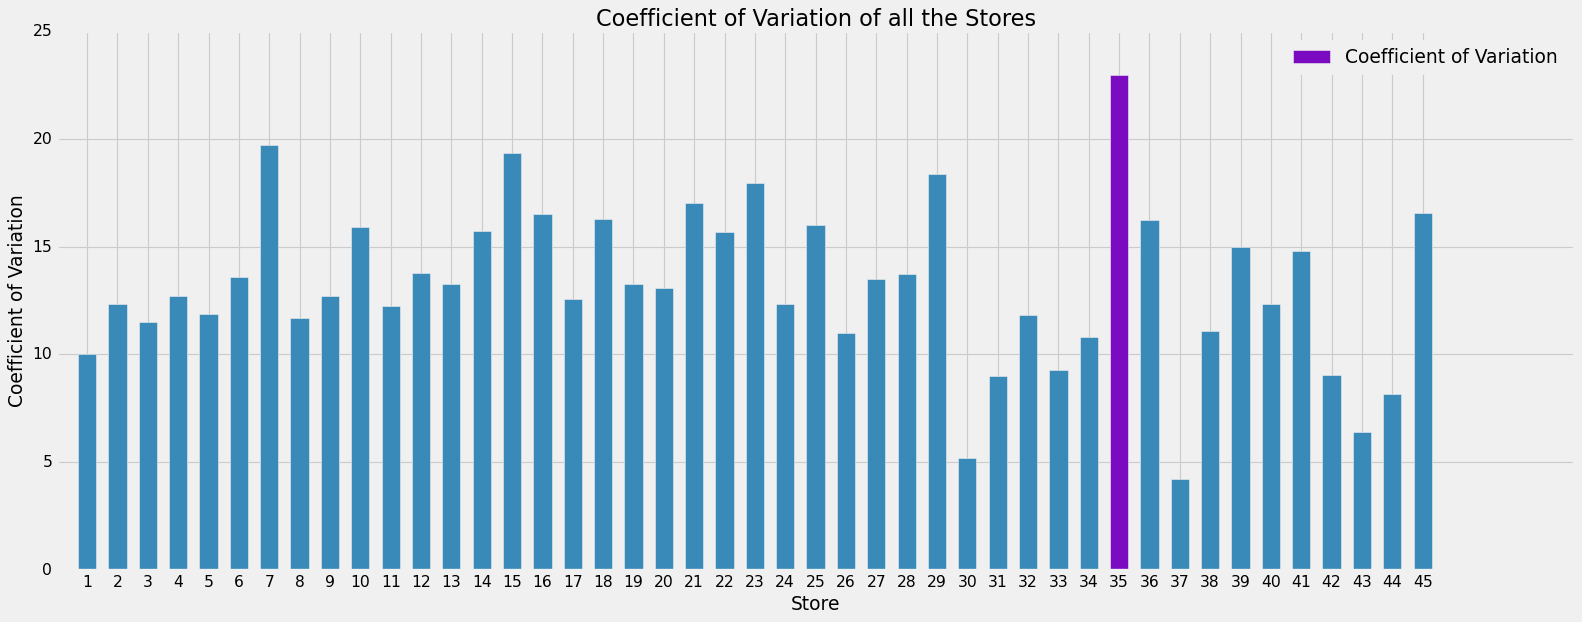

In [19]:
# Plot a bar graph to find the coefficient of variation of all the stores and veriy if Store #35 is the highest
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,8))

# Se colors according to the max coefficient of variation
clr = ['#7A0BC0' if x == max(coef_variation['Coefficient_of_Variation']) else '#398AB9' 
       for x in coef_variation['Coefficient_of_Variation']]

plt.bar(coef_variation['Store'], coef_variation['Coefficient_of_Variation'], 
        label='Coefficient of Variation', color=clr, width=0.6)
plt.xlabel('Store')
plt.ylabel('Coefficient of Variation')
plt.xticks(ticks=coef_variation['Store'], label=coef_variation['Store'])
plt.title('Coefficient of Variation of all the Stores')
plt.legend()
plt.tight_layout()
plt.show()

### From above, Store #35 has the maximum Coefficient of Variation of all the stores

## Task 3: Which store/s has good quarterly growth rate in Q3’2012?

In [20]:
# Find count, mean, std, min, 25%, 50%, 75% and max in the dataset
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


### We can devide the year 2012 into 4 quarters.
* Q1 = January - March
* Q2 = April - June
* Q3 = July - September
* Q4 = October - December

### We must find the best growth rate of sales in Q3

In [21]:
# Set the time frame for Q2 and Q3. Groupt them by store and find sum of their weekly sales
q2 = df[(df['Date'] >= '2012-04-01') & (df['Date'] <= '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
q3 = df[(df['Date'] >= '2012-07-01') & (df['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

In [22]:
# Conert them into dataframes, reset index and rename columns
q2 = pd.DataFrame(q2)
q3 = pd.DataFrame(q3)
q2.reset_index(inplace=True)
q3.reset_index(inplace=True)
q2.rename(columns={'Store':'Store', 'Weekly_Sales':'Q2'}, inplace=True)
q3.rename(columns={'Store':'Store', 'Weekly_Sales':'Q3'}, inplace=True)

In [23]:
# Apply filter to find max of Q3
filt = (q3[q3['Q3'] == max(q3['Q3'])])
filt.reset_index(inplace=True)

# Print the store with max of Q3 along with its growth rate
print(f'''Store #{filt.loc[0, 'Store']} has the maximum growth rate in Q3'2012 with {filt.loc[0, 'Q3']}$''')

Store #4 has the maximum growth rate in Q3'2012 with 25652119.35$


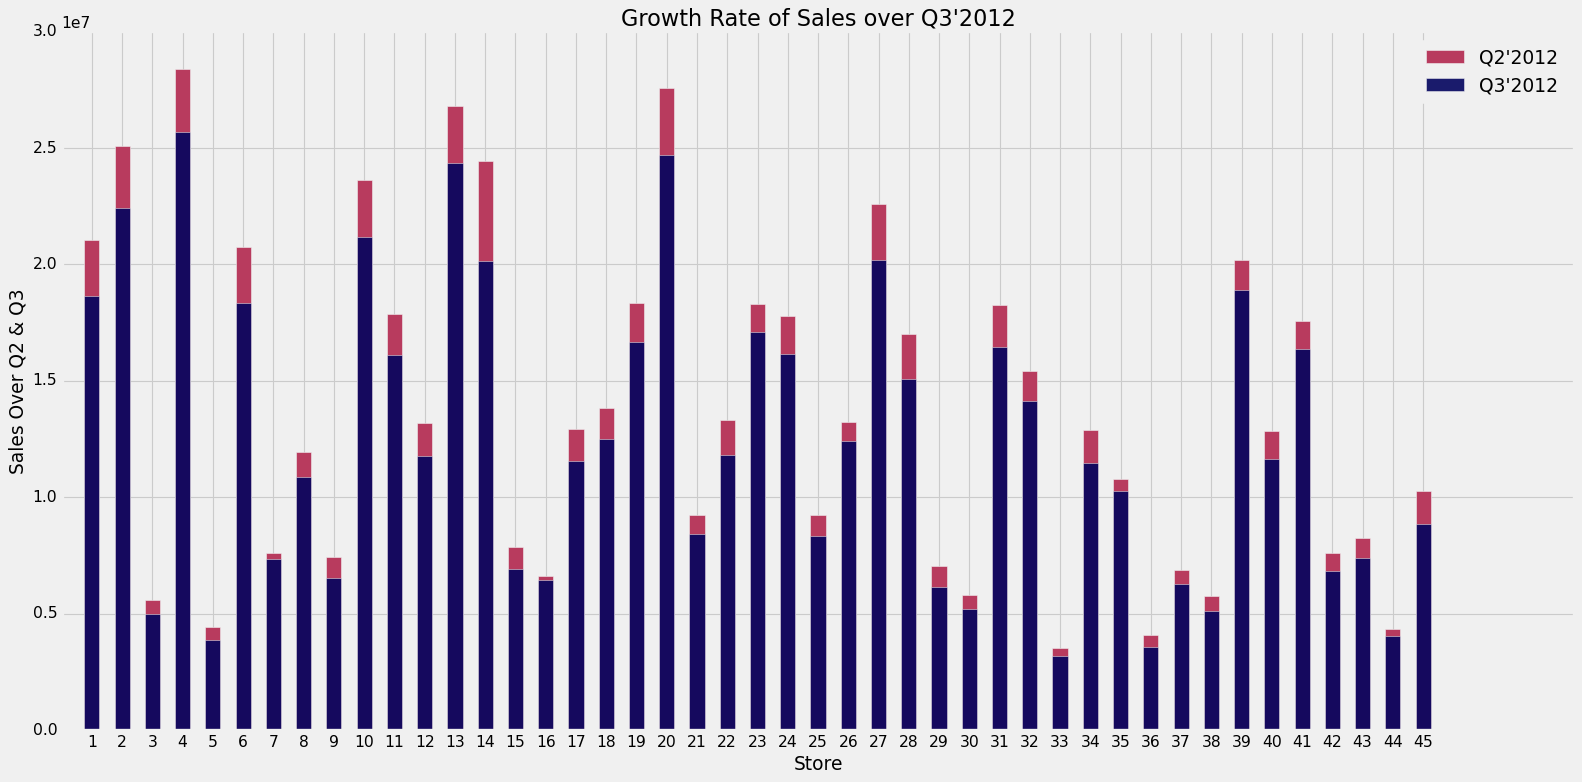

In [24]:
# Plot a bar graph to see the growth rate of sales over Q3'2012
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
plt.bar(q2['Store'], q2['Q2'], label='Q2\'2012', color='#B83B5E', width=0.5)
plt.bar(q2['Store'], q3['Q3'], label='Q3\'2012', color='#03045E', alpha=.9, width=0.5)
plt.xlabel('Store')
plt.xticks(ticks=q2['Store'], label=q2['Store'])
plt.ylabel('Sales Over Q2 & Q3')
plt.title('Growth Rate of Sales over Q3\'2012')
plt.tight_layout()
plt.legend()
plt.show()

### From the above graph, we can clearly see that Store #4 has the maximum growth in sales in Q3'2012

## Task 4: Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

### Holiday Events:

* Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

* Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

* Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

* Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [25]:
# Find total sales by grouping by date and finding sum of weekly sales
total_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Holiday dates are provided
super_bowl = ['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-13']
labour_day = ['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06']
thanksgiving_day = ['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29']
christmas = ['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27']

In [26]:
# Write a function that displays line plot and also highlightes the holidays and shows their sales on that particular day
def plot_line(df,holiday_dates,label):
    plt.style.use('classic')
    fig, ax = plt.subplots(figsize = (15,5))  
    ax.plot(df['Date'],df['Weekly_Sales'],label=label)
    
    for day in holiday_dates:
        day = datetime.strptime(day, '%Y-%m-%d')
        plt.axvline(x=day, linestyle='--', c='r')
    

    plt.title(label)
    x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    xfmt = dates.DateFormatter('%d-%m-%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.grid()
    plt.show()

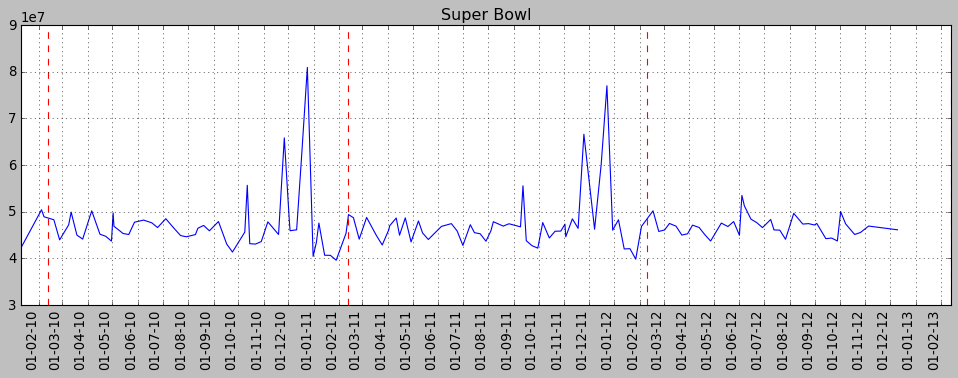

In [27]:
# Use the function plot_line to find the position of sales on Super Bowl holiday
plot_line(total_sales, super_bowl, 'Super Bowl')

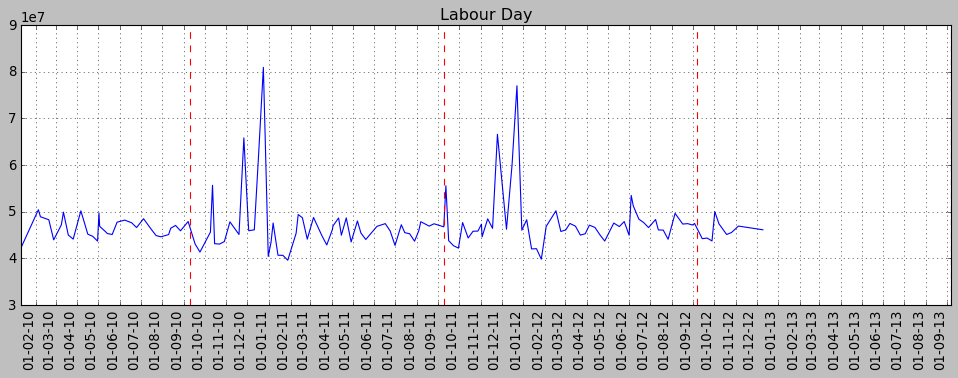

In [28]:
# Use the function plot_line to find the position of sales on labour Day holiday
plot_line(total_sales, labour_day, 'Labour Day')

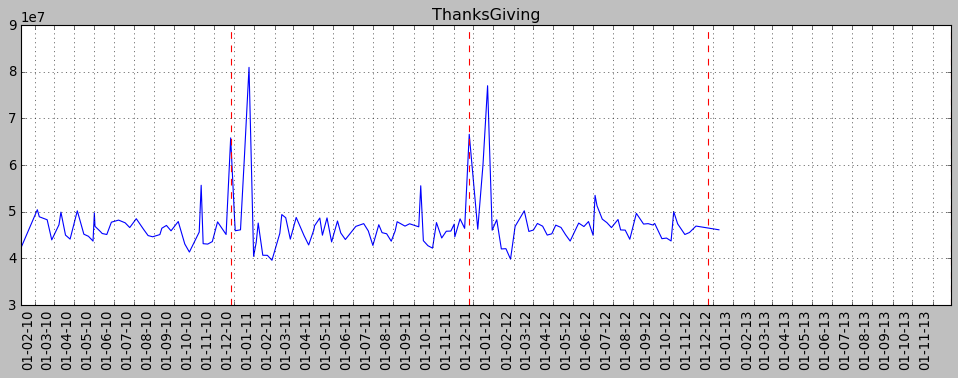

In [29]:
# Use the function plot_line to find the position of sales on ThanksGiving Day holiday
plot_line(total_sales, thanksgiving_day, 'ThanksGiving')

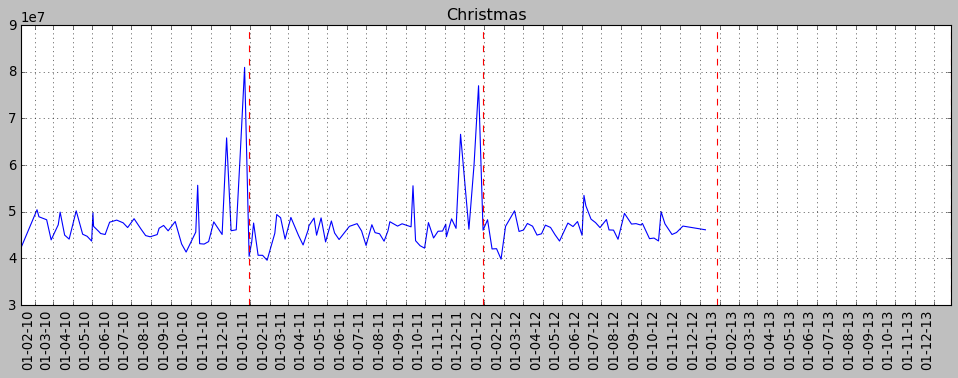

In [30]:
# Use the function plot_line to find the position of sales on Christmas holiday
plot_line(total_sales, christmas, 'Christmas')

### From observing all the four Time-Series charts, we can conclude that compared to the previous month, sales have increased during ThanksGiving Day and sales have decreased during Christmas.

In [31]:
# Find the total sales on Super Bowl
a=df[df['Date']== '12-02-2010']['Weekly_Sales'].sum()
b=df[df['Date']== '11-02-2011']['Weekly_Sales'].sum()
c=df[df['Date']== '10-02-2012']['Weekly_Sales'].sum()
d=df[df['Date']== '08-02-2013']['Weekly_Sales'].sum() 
super_bowl_sale = a+b+c+d

# Find the total sales on Labour Day
a1=df[df['Date']== '10-09-2010']['Weekly_Sales'].sum()
b1=df[df['Date']== '09-09-2011']['Weekly_Sales'].sum()
c1=df[df['Date']== '07-09-2012']['Weekly_Sales'].sum()
d1=df[df['Date']== '06-09-2013']['Weekly_Sales'].sum() 
labour_day_sale = a1+b1+c1+d1

# Find the total sales on ThanksGiving Day
a2=df[df['Date']== '26-11-2010']['Weekly_Sales'].sum()
b2=df[df['Date']== '25-11-2011']['Weekly_Sales'].sum()
c2=df[df['Date']== '23-11-2012']['Weekly_Sales'].sum()
d2=df[df['Date']== '29-11-2013']['Weekly_Sales'].sum() 
thanks_giving_sale = a2+b2+c2+d2

# Find the total sales on Christmas
a3=df[df['Date']== '31-12-2010']['Weekly_Sales'].sum()
b3=df[df['Date']== '30-12-2011']['Weekly_Sales'].sum()
c3=df[df['Date']== '28-12-2012']['Weekly_Sales'].sum()
d3=df[df['Date']== '27-12-2013']['Weekly_Sales'].sum() 
christmas = a3+b3+c3+d3

print('super_bowl_sale : ',super_bowl_sale)
print('labour_day_sale : ',labour_day_sale)
print('thanks_giving_sale : ',thanks_giving_sale)
print('christmas : ',christmas)

super_bowl_sale :  145682278.34000003
labour_day_sale :  140727684.68
thanks_giving_sale :  132414608.5
christmas :  86474980.04


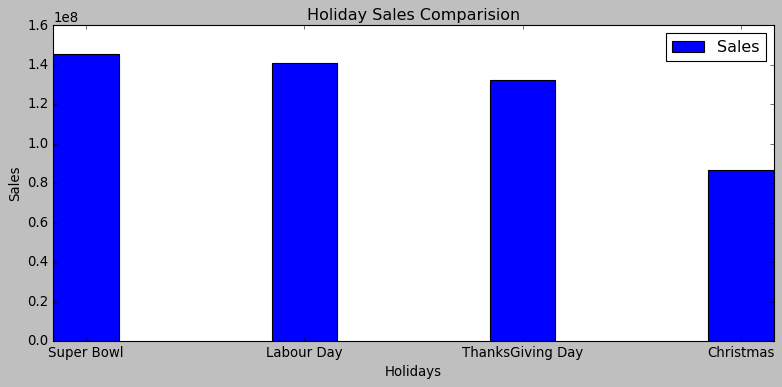

In [32]:
# Plot a bar graph to compare different holidays
x_list = ['Super Bowl', 'Labour Day', 'ThanksGiving Day', 'Christmas']
y_list = [super_bowl_sale, labour_day_sale, thanks_giving_sale, christmas]

plt.style.use('classic')
plt.figure(figsize=(10,5))
plt.bar(x_list, y_list, label='Sales', width=0.3)
plt.xlabel('Holidays')
plt.ylabel("Sales")
plt.title('Holiday Sales Comparision')
plt.legend()
plt.tight_layout()
plt.show()

### Among all the four holidays, Super Bowl has the most sales, followed by Labour Day and ThanksGiving Day. Christmas has the least sales among the holidays.

In [33]:
# Find the non-holiday sales mean of all the stores
non_holiday_sales_mean = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
non_holiday_sales_mean

1041256.3802088564

In [34]:
# Check if holiday sales are greater than non-holiday sales mean of all the stores
print(super_bowl_sale > non_holiday_sales_mean)
print(labour_day_sale > non_holiday_sales_mean)
print(thanks_giving_sale > non_holiday_sales_mean)
print(christmas > non_holiday_sales_mean)

True
True
True
True


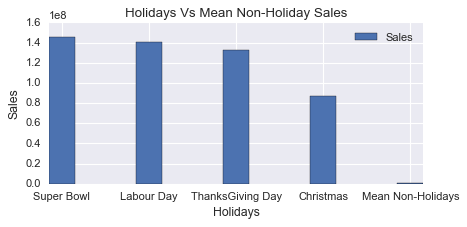

In [35]:
# Compare holidays with non-holiday sales mean of all the stores by plotting them on a bar graph
x_list.append('Mean Non-Holidays')
y_list.append(non_holiday_sales_mean)
plt.style.use('seaborn')
plt.figure(figsize=(6,3))
plt.bar(x_list, y_list, label='Sales', width=0.3)
plt.xlabel('Holidays')
plt.ylabel("Sales")
plt.title('Holidays Vs Mean Non-Holiday Sales')
plt.legend()
plt.tight_layout()
plt.show()

### From above, it is clear that all the holidays have higher sales than mean sales in non-holiday season for all stores together

## Task 5: Provide a monthly and semester view of sales in units and give insights

In [36]:
# Create 3 new columns for day, month and year
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


In [37]:
# Find the number of rows and columns in the dataframe
df.shape

(6435, 11)

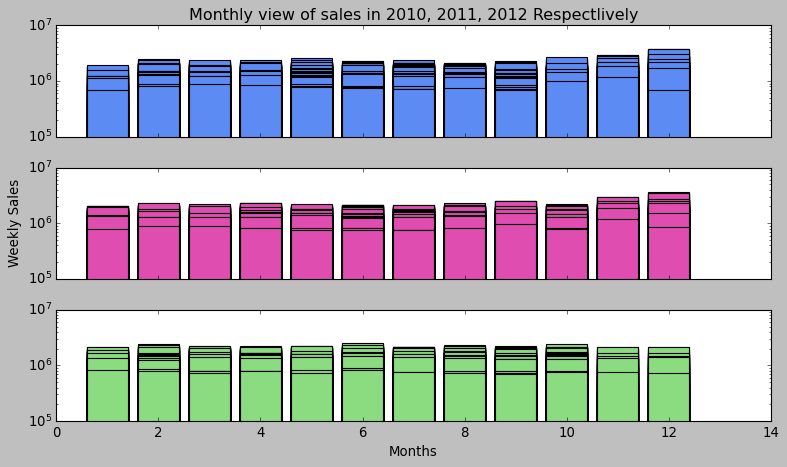

In [38]:
# Monthly view of sales for each years
# Plot them on a bar graph
plt.style.use('classic')
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True)
fig.set_size_inches(10, 6)

ax1.bar(df[df['Year']==2010]["Month"],df[df['Year']==2010]["Weekly_Sales"], color='#5D8BF4')
ax1.set_yscale("log")
ax1.set_title("Monthly view of sales in 2010, 2011, 2012 Respectlively")

ax2.bar(df[df['Year']==2011]["Month"],df[df['Year']==2011]["Weekly_Sales"], color='#E04DB0')
ax2.set_ylabel("Weekly Sales")

ax3.bar(df[df['Year']==2012]["Month"],df[df['Year']==2012]["Weekly_Sales"], color='#8BDB81')
ax3.set_xlabel("Months")

plt.tight_layout()
plt.show()

### The Holiday months have see increase in sales compared to its previous months.
### The year 2012, when compared to the 2010 and 2011, have seen slight decrease in the sales of the holidays months ThanksGiving Day and Christmas
### The Non-Holiday months have similar sales in all the three years, with only slight variation in the year 2010.

In [39]:
# Find the semester sales for each years
sem1_2010 = df[(df['Date'] >= '2010-01-01') & (df['Date'] <= '2010-06-30')].groupby('Date')['Weekly_Sales'].sum()
sem2_2010 = df[(df['Date'] >= '2010-07-01') & (df['Date'] <= '2010-12-31')].groupby('Date')['Weekly_Sales'].sum()
sem1_2010 = pd.DataFrame(sem1_2010)['Weekly_Sales'].sum()
sem2_2010 = pd.DataFrame(sem2_2010)['Weekly_Sales'].sum()

sem1_2011 = df[(df['Date'] >= '2011-01-01') & (df['Date'] <= '2011-06-30')].groupby('Date')['Weekly_Sales'].sum()
sem2_2011 = df[(df['Date'] >= '2011-07-01') & (df['Date'] <= '2011-12-31')].groupby('Date')['Weekly_Sales'].sum()
sem1_2011 = pd.DataFrame(sem1_2011)['Weekly_Sales'].sum()
sem2_2011 = pd.DataFrame(sem2_2011)['Weekly_Sales'].sum()

sem1_2012 = df[(df['Date'] >= '2012-01-01') & (df['Date'] <= '2012-06-30')].groupby('Date')['Weekly_Sales'].sum()
sem2_2012 = df[(df['Date'] >= '2012-07-01') & (df['Date'] <= '2012-12-31')].groupby('Date')['Weekly_Sales'].sum()
sem1_2012 = pd.DataFrame(sem1_2012)['Weekly_Sales'].sum()
sem2_2012 = pd.DataFrame(sem2_2012)['Weekly_Sales'].sum()

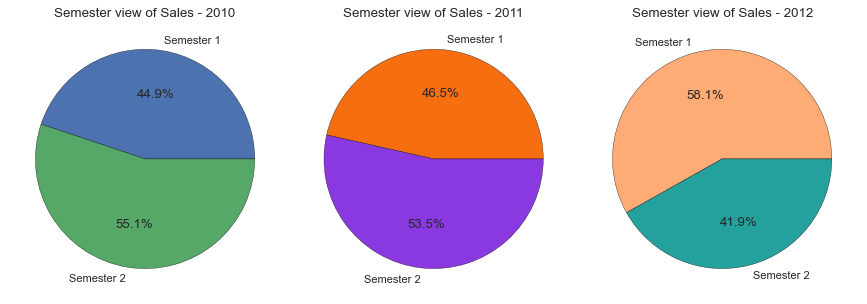

In [40]:
# Plot a pie chart to view the difference in the semesters of all the years

slices_2010 = [sem1_2010, sem2_2010]
slices_2011 = [sem1_2011, sem2_2011]
slices_2012 = [sem1_2012, sem2_2012]
labels = ['Semester 1', 'Semester 2']

plt.style.use('seaborn')
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(11, 11)

ax1.pie(slices_2010, labels=labels, wedgeprops={'edgecolor':'black'}, autopct='%1.1f%%')
ax1.set_title("Semester view of Sales - 2010")

ax2.pie(slices_2011, labels=labels, wedgeprops={'edgecolor':'black'}, autopct='%1.1f%%', colors=['#F76E11', '#8A39E1'])
ax2.set_title("Semester view of Sales - 2011")

ax3.pie(slices_2012, labels=labels, wedgeprops={'edgecolor':'black'}, autopct='%1.1f%%', colors=['#FFAB76', '#24A19C'])
ax3.set_title("Semester view of Sales - 2012")

plt.tight_layout()
plt.show()

### From the above Pie charts, we can see that in the years 2010 & 2011, the second semester, i.e, from July to December has more number of sales when compared to the first semester, i.e, from January to June.
### In the year 2012, the situation is reversed, i.e, the first semester has more sales when compared to the second semester.

## Statistical Model

## Task 6: For Store #1 - Build prediction models to forecast demand
* Linear Regression - Utilize variables like date and restructure dates. Hypothesize if CPI, unemployment, and fuel price have any impact on sales.
* Change dates into days by creating new variable.

#### Select the model which gives best accuracy

In [41]:
# Create a new column to find the day of the week
df['Day_Of_Week'] = df['Date'].dt.dayofweek

In [42]:
# View the first 5 records
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Day_Of_Week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,6
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,3
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010,0


In [43]:
# Convert the categorical data into dummy variables and join it to the dataframe
sample = pd.get_dummies(df["Store"])

# Drop the store column
df = df.drop('Store',axis = 1)
df = df.join(sample)

In [44]:
# Standardize features by removing the mean and scaling to unit variance.
# Perform standardization for Temperature, Fuel_Price and Unemployment
scaler = StandardScaler()
scale_temp = scaler.fit_transform(df[['Temperature']]) 
df['Temperature'] = scale_temp
scale_fuel = scaler.fit_transform(df[['Fuel_Price']]) 
df['Fuel_Price'] = scale_fuel
scale_unemployment = scaler.fit_transform(df[['Unemployment']]) 
df['Unemployment'] = scale_unemployment

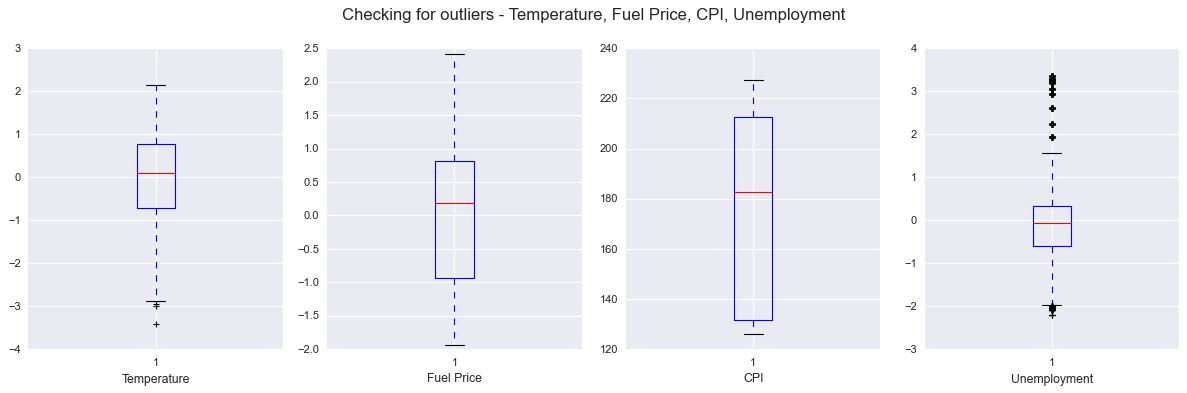

In [45]:
# Plot Temperature, Fuel_Price, CPI & Unemployment on a boxplot to find the outliers
plt.style.use('seaborn')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(15, 5)

ax1.boxplot(df['Temperature'])
ax1.set_xlabel('Temperature')

ax2.boxplot(df['Fuel_Price'])
ax2.set_xlabel('Fuel Price')

ax3.boxplot(df['CPI'])
ax3.set_xlabel('CPI')

ax4.boxplot(df['Unemployment'])
ax4.set_xlabel('Unemployment')

fig.suptitle('Checking for outliers - Temperature, Fuel Price, CPI, Unemployment', fontsize=15)
plt.tight_layout()
plt.show()

In [46]:
# Remove the outliers
df = df[(df['Unemployment'] > -1.8) & (df['Unemployment'] < 1.5) & (df['Temperature'] > -2.9)]

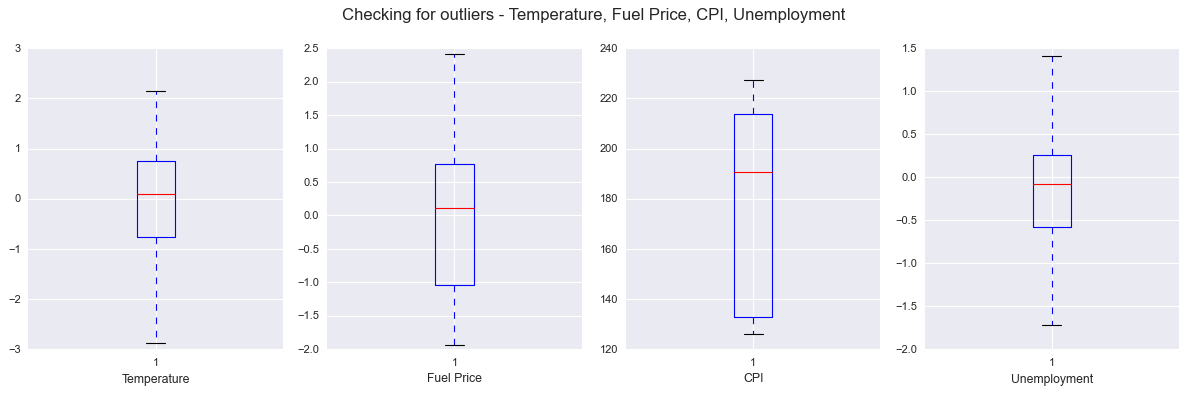

In [47]:
# Check if the outliers are removed by plotting a boxplot
plt.style.use('seaborn')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(15, 5)

ax1.boxplot(df['Temperature'])
ax1.set_xlabel('Temperature')

ax2.boxplot(df['Fuel_Price'])
ax2.set_xlabel('Fuel Price')

ax3.boxplot(df['CPI'])
ax3.set_xlabel('CPI')

ax4.boxplot(df['Unemployment'])
ax4.set_xlabel('Unemployment')

fig.suptitle('Checking for outliers - Temperature, Fuel Price, CPI, Unemployment', fontsize=15)
plt.tight_layout()
plt.show()

### Building Model

In [48]:
# Create features and target for building a model
X_feature = df.drop(columns=['Weekly_Sales','Date'],axis=1)
Y_target = df['Weekly_Sales']

In [49]:
# Split the data into testing and training datasets with 20%-80% testing and training datasets respectively
x_train, x_test,y_train, y_test = train_test_split(
    X_feature, Y_target, test_size=0.2, train_size=0.8, random_state=1
)

In [50]:
# Find the shape to check if testing and training datasets are properly split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4665, 54)
(1167, 54)
(4665,)
(1167,)


In [51]:
# Create an object for linear regression
model = LinearRegression()

In [52]:
# Fit the training dataset into the linear regression
model.fit(x_train,y_train)

LinearRegression()

In [53]:
# Predict the outcome based on the testing dataset of features
y_prediction = model.predict(x_test)

In [54]:
# Aquire the accuracy and Mean Square Error
r2 = r2_score(y_test,y_prediction)
mse = mean_squared_error(y_test,y_prediction)
accuracy = round(r2*100,2)
print(f'Accuracy is : {accuracy} %')
print('Mean Square Error :',mse)

Accuracy is : 92.97 %
Mean Square Error : 23091831952.214424


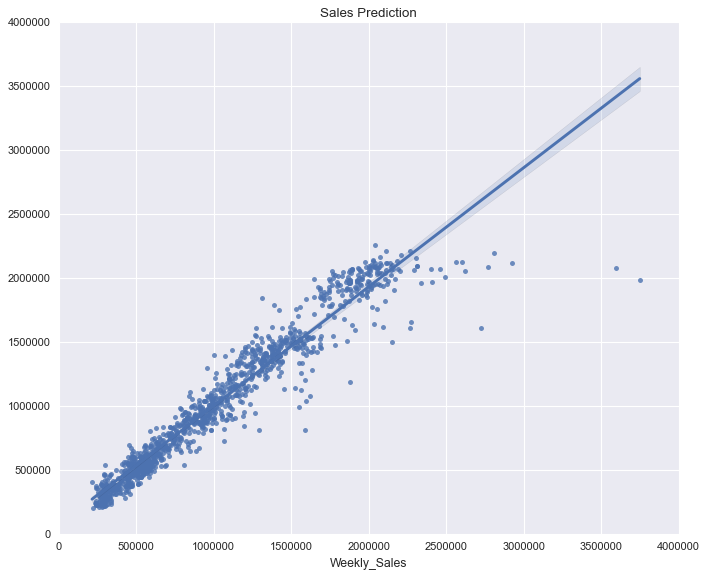

In [55]:
# Plot the target testing dataset and the predictions on a regplot
plt.style.use('seaborn')
plt.figure(figsize=(10, 8))
sns.regplot(x=y_test, y=y_prediction)
plt.title('Sales Prediction')
plt.show()

### From above, we can predict 92.97% of sales accurately.

#### Data Accurecy Check with comparing ACTUAL vs PREDICTED

In [56]:
# Find the error by finding the difference between target testing dataset and the prediction
y_error = y_test - y_prediction

# Convert the resulting values to dataframe and transpose the index and columns, rename the columns
error_data=pd.DataFrame(np.array([y_test,y_prediction,y_error])).T
error_data=error_data.rename(columns={0:'Actual',1:'Predicted',2:'Error',3:'Accurcy%'})
error_data

,Actual,Predicted,Error
0,1333315.03,1408739.0,-75423.97
1,986612.02,968181.5,18430.52
2,454800.96,442851.5,11949.46
3,508213.14,494696.5,13516.64
4,1078900.44,885622.0,193278.44
...,...,...,...
1162,938303.28,861647.5,76655.78
1163,1800171.36,1897454.0,-97282.64
1164,2309025.16,2087241.5,221783.66
1165,583835.18,440078.0,143757.18


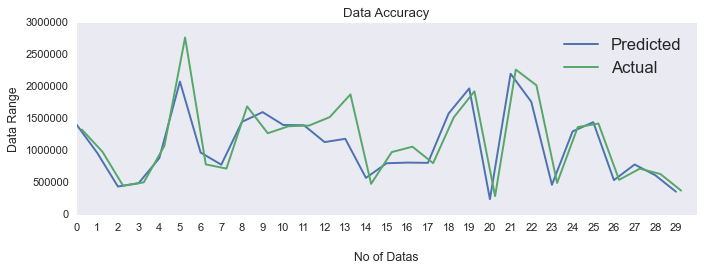

In [57]:
# Plot a line plot between the actual and predicted values
plt.style.use('seaborn')
plt.figure(figsize=(10,3))
no_of_data_show = 30
predicted = list(error_data['Predicted'])[0:no_of_data_show] 
actual = list(error_data['Actual'])[0:no_of_data_show]

n=len(predicted) 
r = np.arange(n)
width = 0.25

  
plt.plot(r, predicted, label='Predicted')
plt.plot(r + width, actual, label='Actual')
  
plt.xlabel("\nNo of Datas")
plt.ylabel("Data Range")
plt.title("Data Accuracy")
plt.legend(fontsize=15)
plt.grid(color='b', linestyle='-', linewidth=0.9)
plt.xticks(np.arange(0, no_of_data_show, step=1)) 
plt.show()

## Conclusion:

### Task 1. 
### Store with maximum sales is Store #20

### Task 2.
### Store with maximum standard deviation is Store #14 whilw Store #35 has the highest coefficient of mean to standard deviation

### Task 3.
### Store that has good growth rate oer Q3'2012 is Store #4

### Task 4.
### Christmas holidays have negative impact on sales.
### Among all the four holidays, Super Bowl has the most sales, followed by Labour Day and ThanksGiving Day. Christmas has the least sales among the holidays.
### Compared to the previous month, sales have increased during ThanksGiving Day and sales have decreased during Christmas.
### All the holidays have higher sales when compared to mean sales in non-holiday sales for all stores.

### Task 5.
### The Holiday months have see increase in sales compared to its previous months. 
### The year 2012, when compared to the 2010 and 2011, have seen slight decrease in the sales of the holidays months ThanksGiving Day and Christmas. 
### The Non-Holiday months have similar sales in all the three years, with only slight variation in the year 2010. 
### In the years 2010 & 2011, the second semester, i.e, from July to December has more number of sales when compared to the first semester, i.e, from January to June. In the year 2012, the situation is reversed, i.e, the first semester has more sales when compared to the second semester.

### Task 6. 
### Built a prediction model using LinearRegression to forcast demand. 
### It is found that Temperature and Unemployment are negatively affecting the sales. 
### By using Linear Regression, we are able to predict the outcome with an accuracy of 92.97%.